In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
apple_stk=pd.read_csv("/content/drive/MyDrive/AAPL.csv")

In [ ]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [5]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
apple_stk['Close']=apple_stk['Close'].astype('float32')

In [7]:
a = apple_stk
size = int(len(a) * 0.60)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1206


In [8]:
X = apple_stk['Close'].values
#X=X.astype('float32')
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]

In [9]:
train

array([ 58.747143,  59.06286 ,  59.71857 , ..., 116.98    , 117.63    ,
       117.55    ], dtype=float32)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1206
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 252)   Log Likelihood               -1959.380
Date:                             Tue, 04 Apr 2023   AIC                           3926.761
Time:                                     05:41:02   BIC                           3946.199
Sample:                                          0   HQIC                          3934.166
                                            - 1206                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0156      0.032     -0.480      0.631      -0.079       0.048
ar.S.L252     -0.5809      

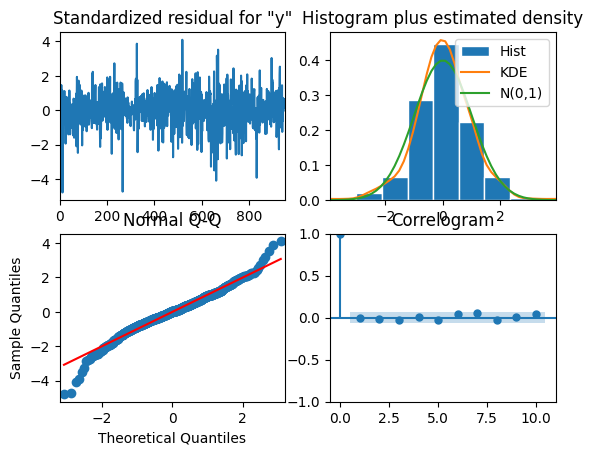

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(1,1,0),
                seasonal_order=(2,1,0,252))
res=sarima.fit(disp=False,low_memory=True)
print(res.summary())
print(res.plot_diagnostics())

In [12]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [13]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.640
Test RMSE: 48.767


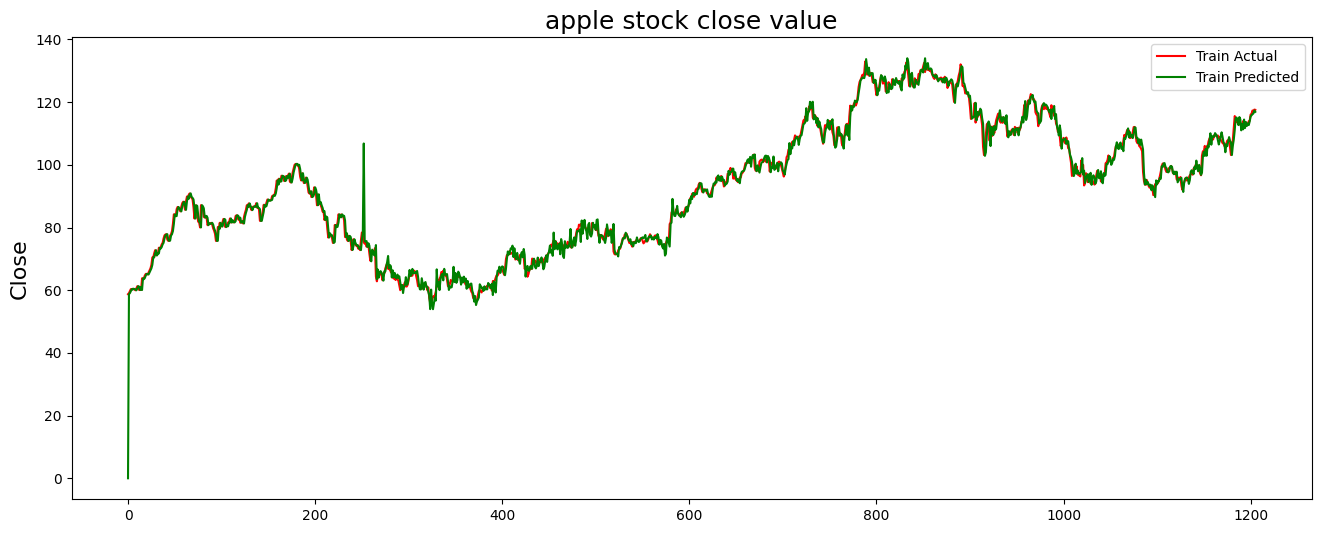

In [16]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='red')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

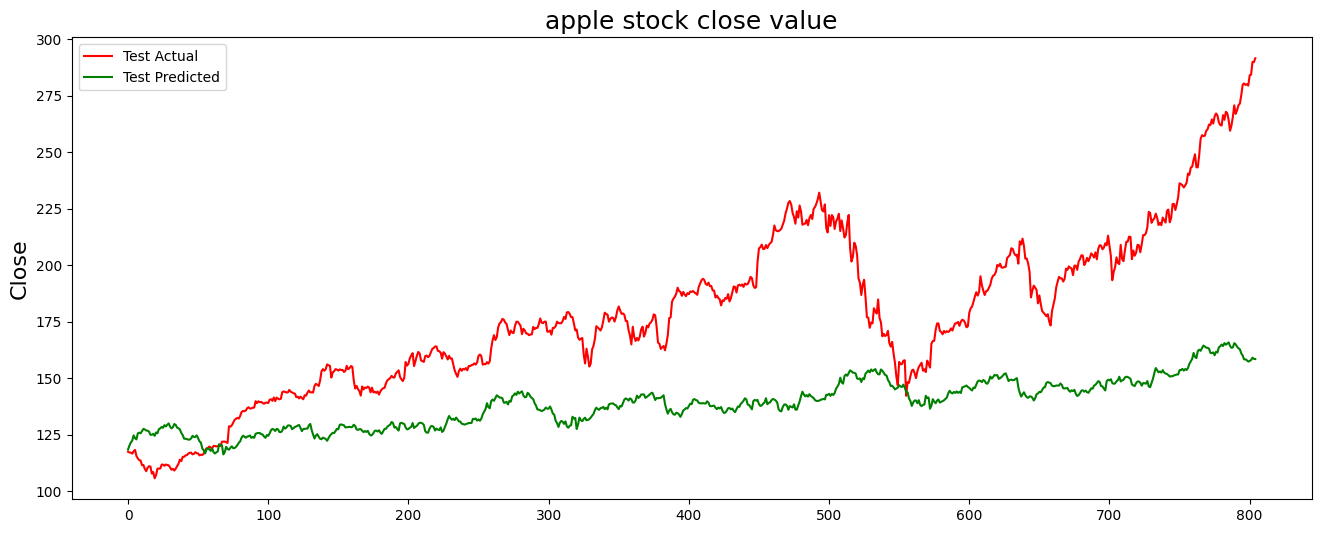

In [15]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()